# FASTKDE

An efficient kernel density estimation for approximating multivariate distributions.

Reference: https://github.com/LBL-EESA/fastkde

In [ ]:
!pip install -q fastKDE

In [2]:
#! pip install --upgrade -q statsmodels
import statsmodels.api as sm

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
import numpy as np
import fastkde
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity

In [5]:
#Generate two random variables dataset (representing 100000 pairs of datapoints)
N1 = np.random.normal(size=1000)
N2 = np.random.normal(scale=0.5, size=1000)
x = N1+N2
y = N1-N2

In [11]:
#Do the self-consistent density estimate
# myPDF,axes = fastKDE.pdf(x,y,numPoints=2**8+1,ecfPrecision=2)

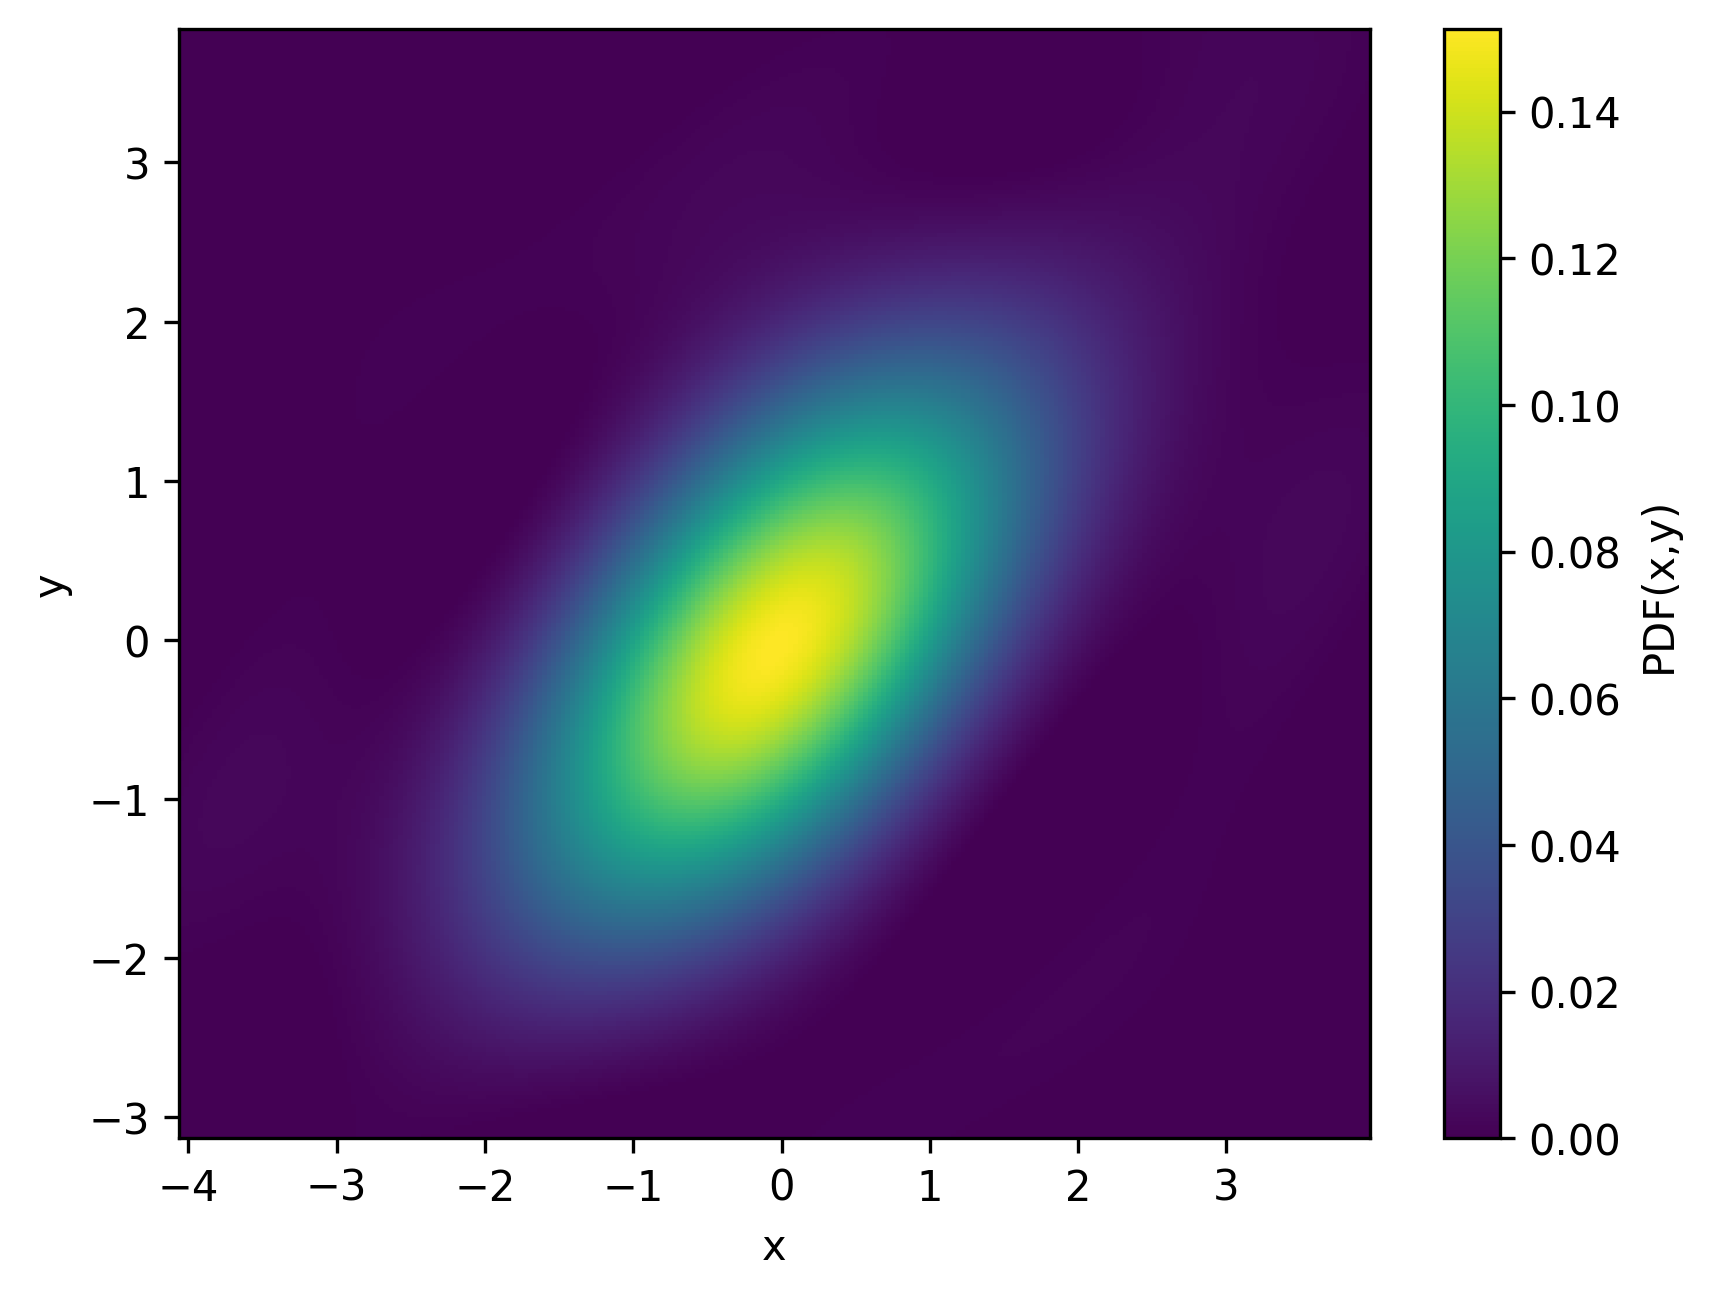

In [41]:
myPDF = fastkde.pdf(x,y,num_points=513,var_names=['x','y'])
myPDF.plot()
plt.show()

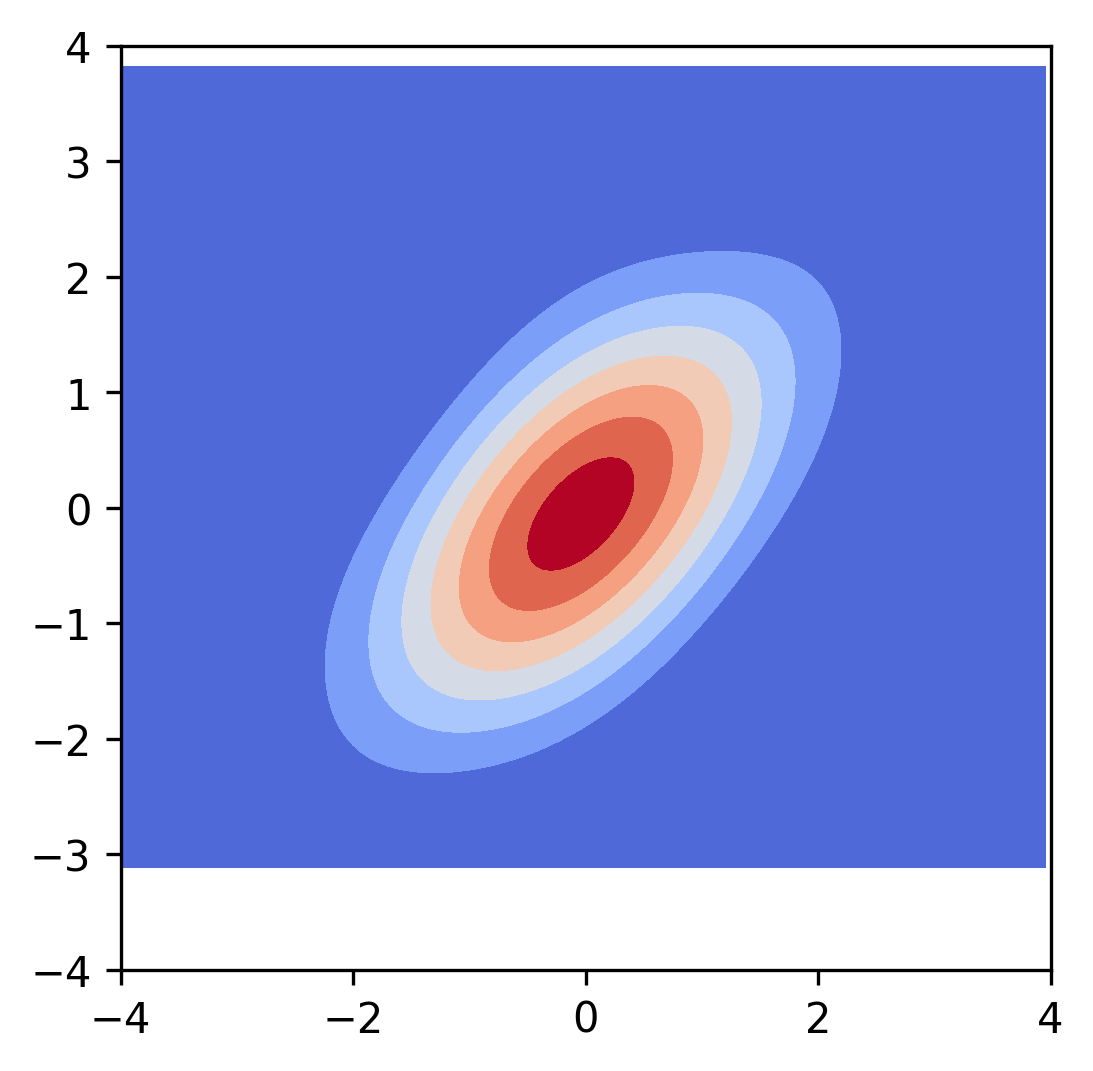

In [42]:
#Extract the axes from the axis list
v1,v2 = myPDF.x, myPDF.y

#Plot contours of the PDF should be a set of concentric ellipsoids centered on
#(0.1, -300) Comparitively, the y axis range should be tiny and the x axis range
#should be large
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v1),len(v2)),cmap='coolwarm',vmin=0,vmax=0.15)
#plt.contour(v1,v2,myPDF,colors='k',levels=[0.002,0.02,0.04,0.06,0.08,0.1,0.12,0.14],vmax=0.15)
plt.show()

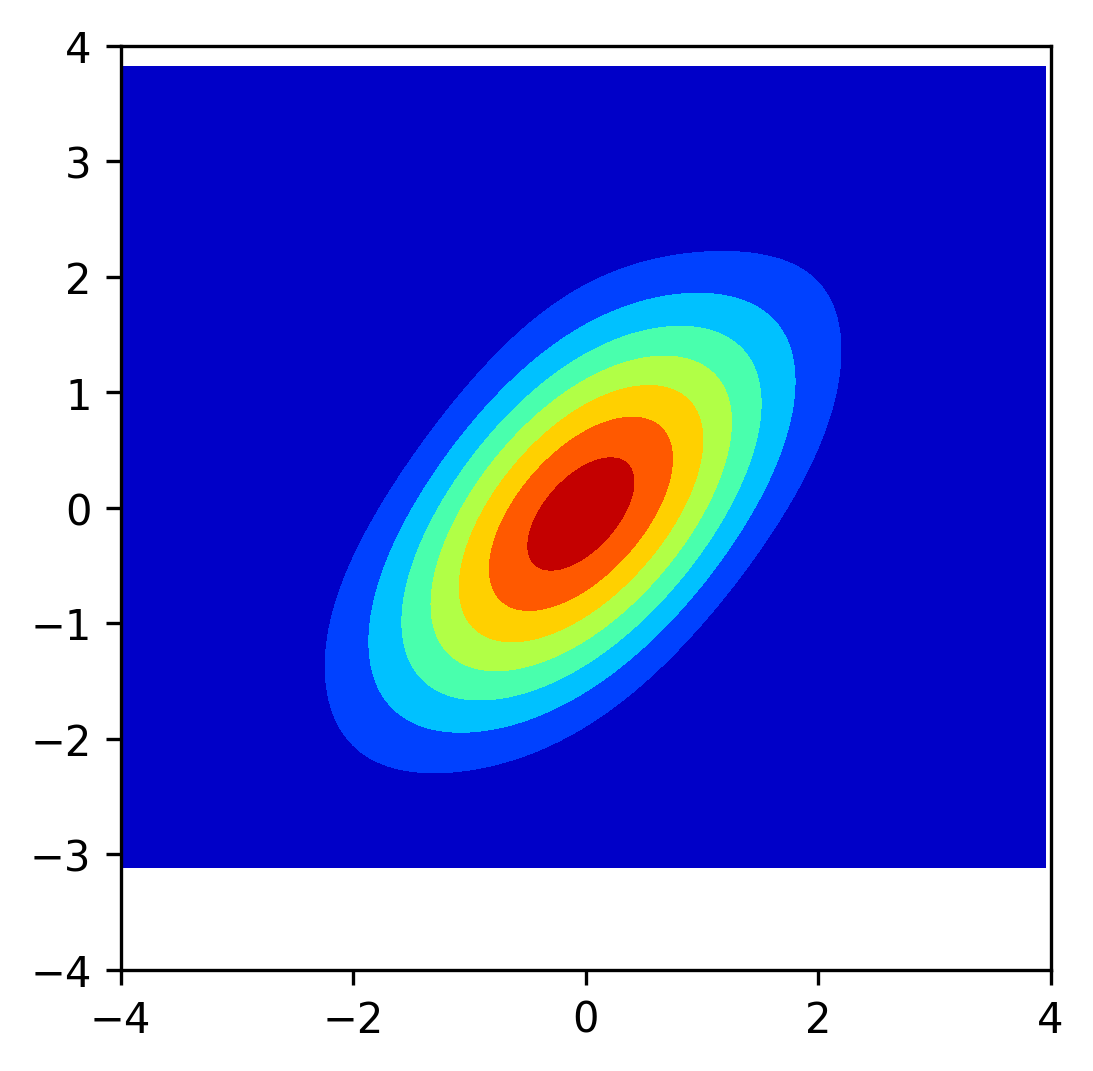

In [43]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v1),len(v2)),cmap='jet',vmin=0,vmax=0.16)
#plt.contour(v1,v2,myPDF,colors='k')
plt.show()

# Comparison with Different KDE Methods

In [44]:
dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')

In [45]:
xmin = -4 #x.min()
xmax = 4 # x.max()
ymin = -4 #y.min()
ymax = 4  #y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = dens_u.pdf(positions)

In [ ]:
X.shape

(100, 100)

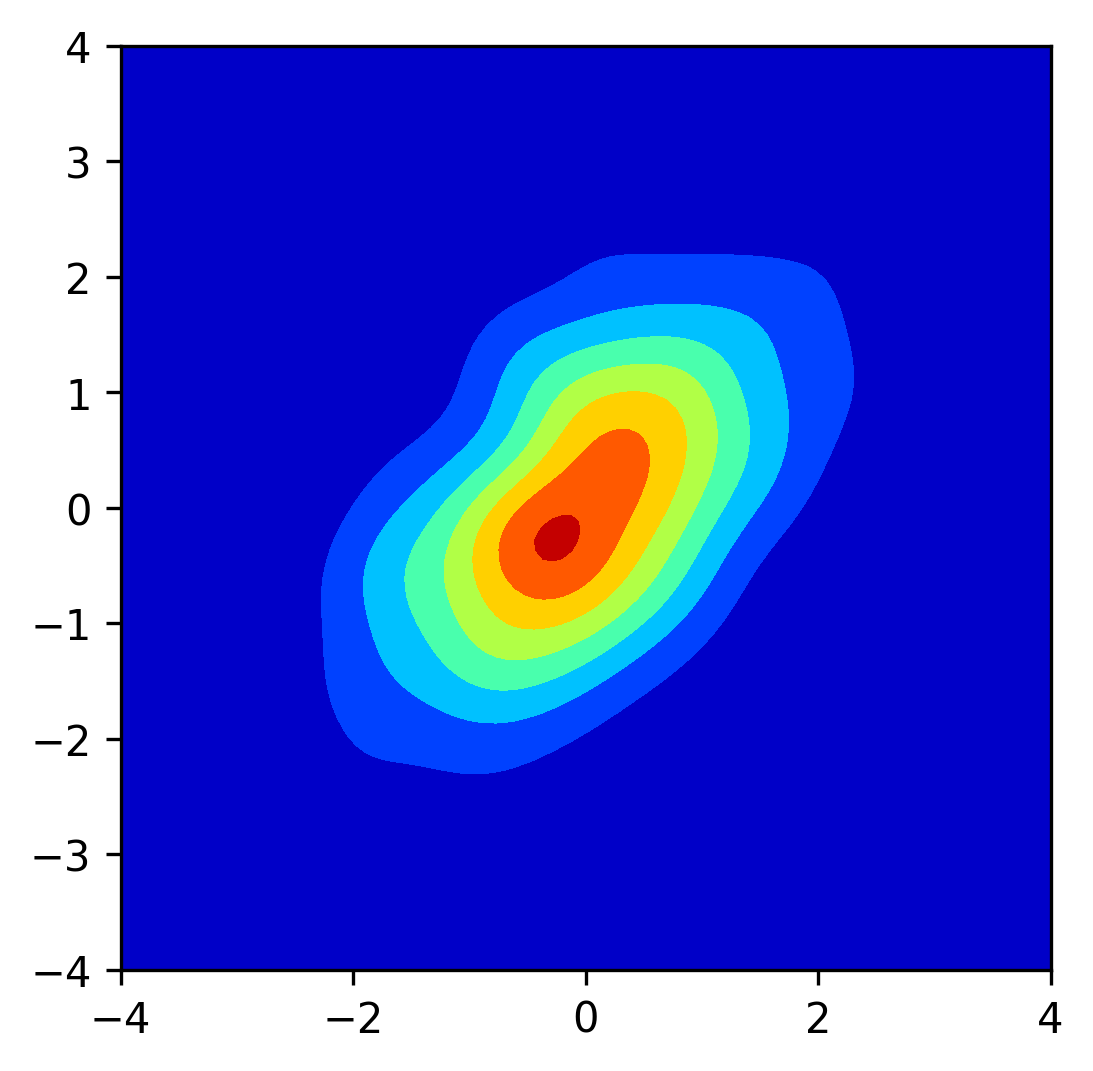

In [46]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(X,Y,np.reshape(Z,X.shape),cmap='jet',vmin=0,vmax=0.16)
plt.show()

In [55]:
def kde1(x, y, ax):
    from scipy.stats import gaussian_kde

    # Calculate the point density
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy) # bw_method='scott'

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(kernel(positions).T, X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde2(x, y, ax):
    from sklearn.neighbors import KernelDensity

    xy = np.vstack([x,y])

    d = xy.shape[0]
    n = xy.shape[1]
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
    #bw = n**(-1./(d+4)) # scott
    print('bw: {}'.format(bw))

    kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(xy.T)

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()


    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde3(x,y,ax):
  dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')
  xmin = x.min()
  xmax = x.max()
  ymin = y.min()
  ymax = y.max()

  X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
  positions = np.vstack([X.ravel(), Y.ravel()])
  Z = np.reshape(dens_u.pdf(positions),X.shape)
  ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4], vmin=0,vmax=0.15)

  #ax.contour(X, Y, Z, colors='k')

def kde4(x,y,ax):
  Z = fastkde.pdf(x,y,num_points=2**8+1,var_names=['X','Y'])
  X,Y = Z.X, Z.Y
  ax.imshow(np.rot90(np.array(Z).reshape(len(X),len(Y))), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)
  #ax.contour(X, Y, Z, colors='k')

bw: 0.31622776601683794


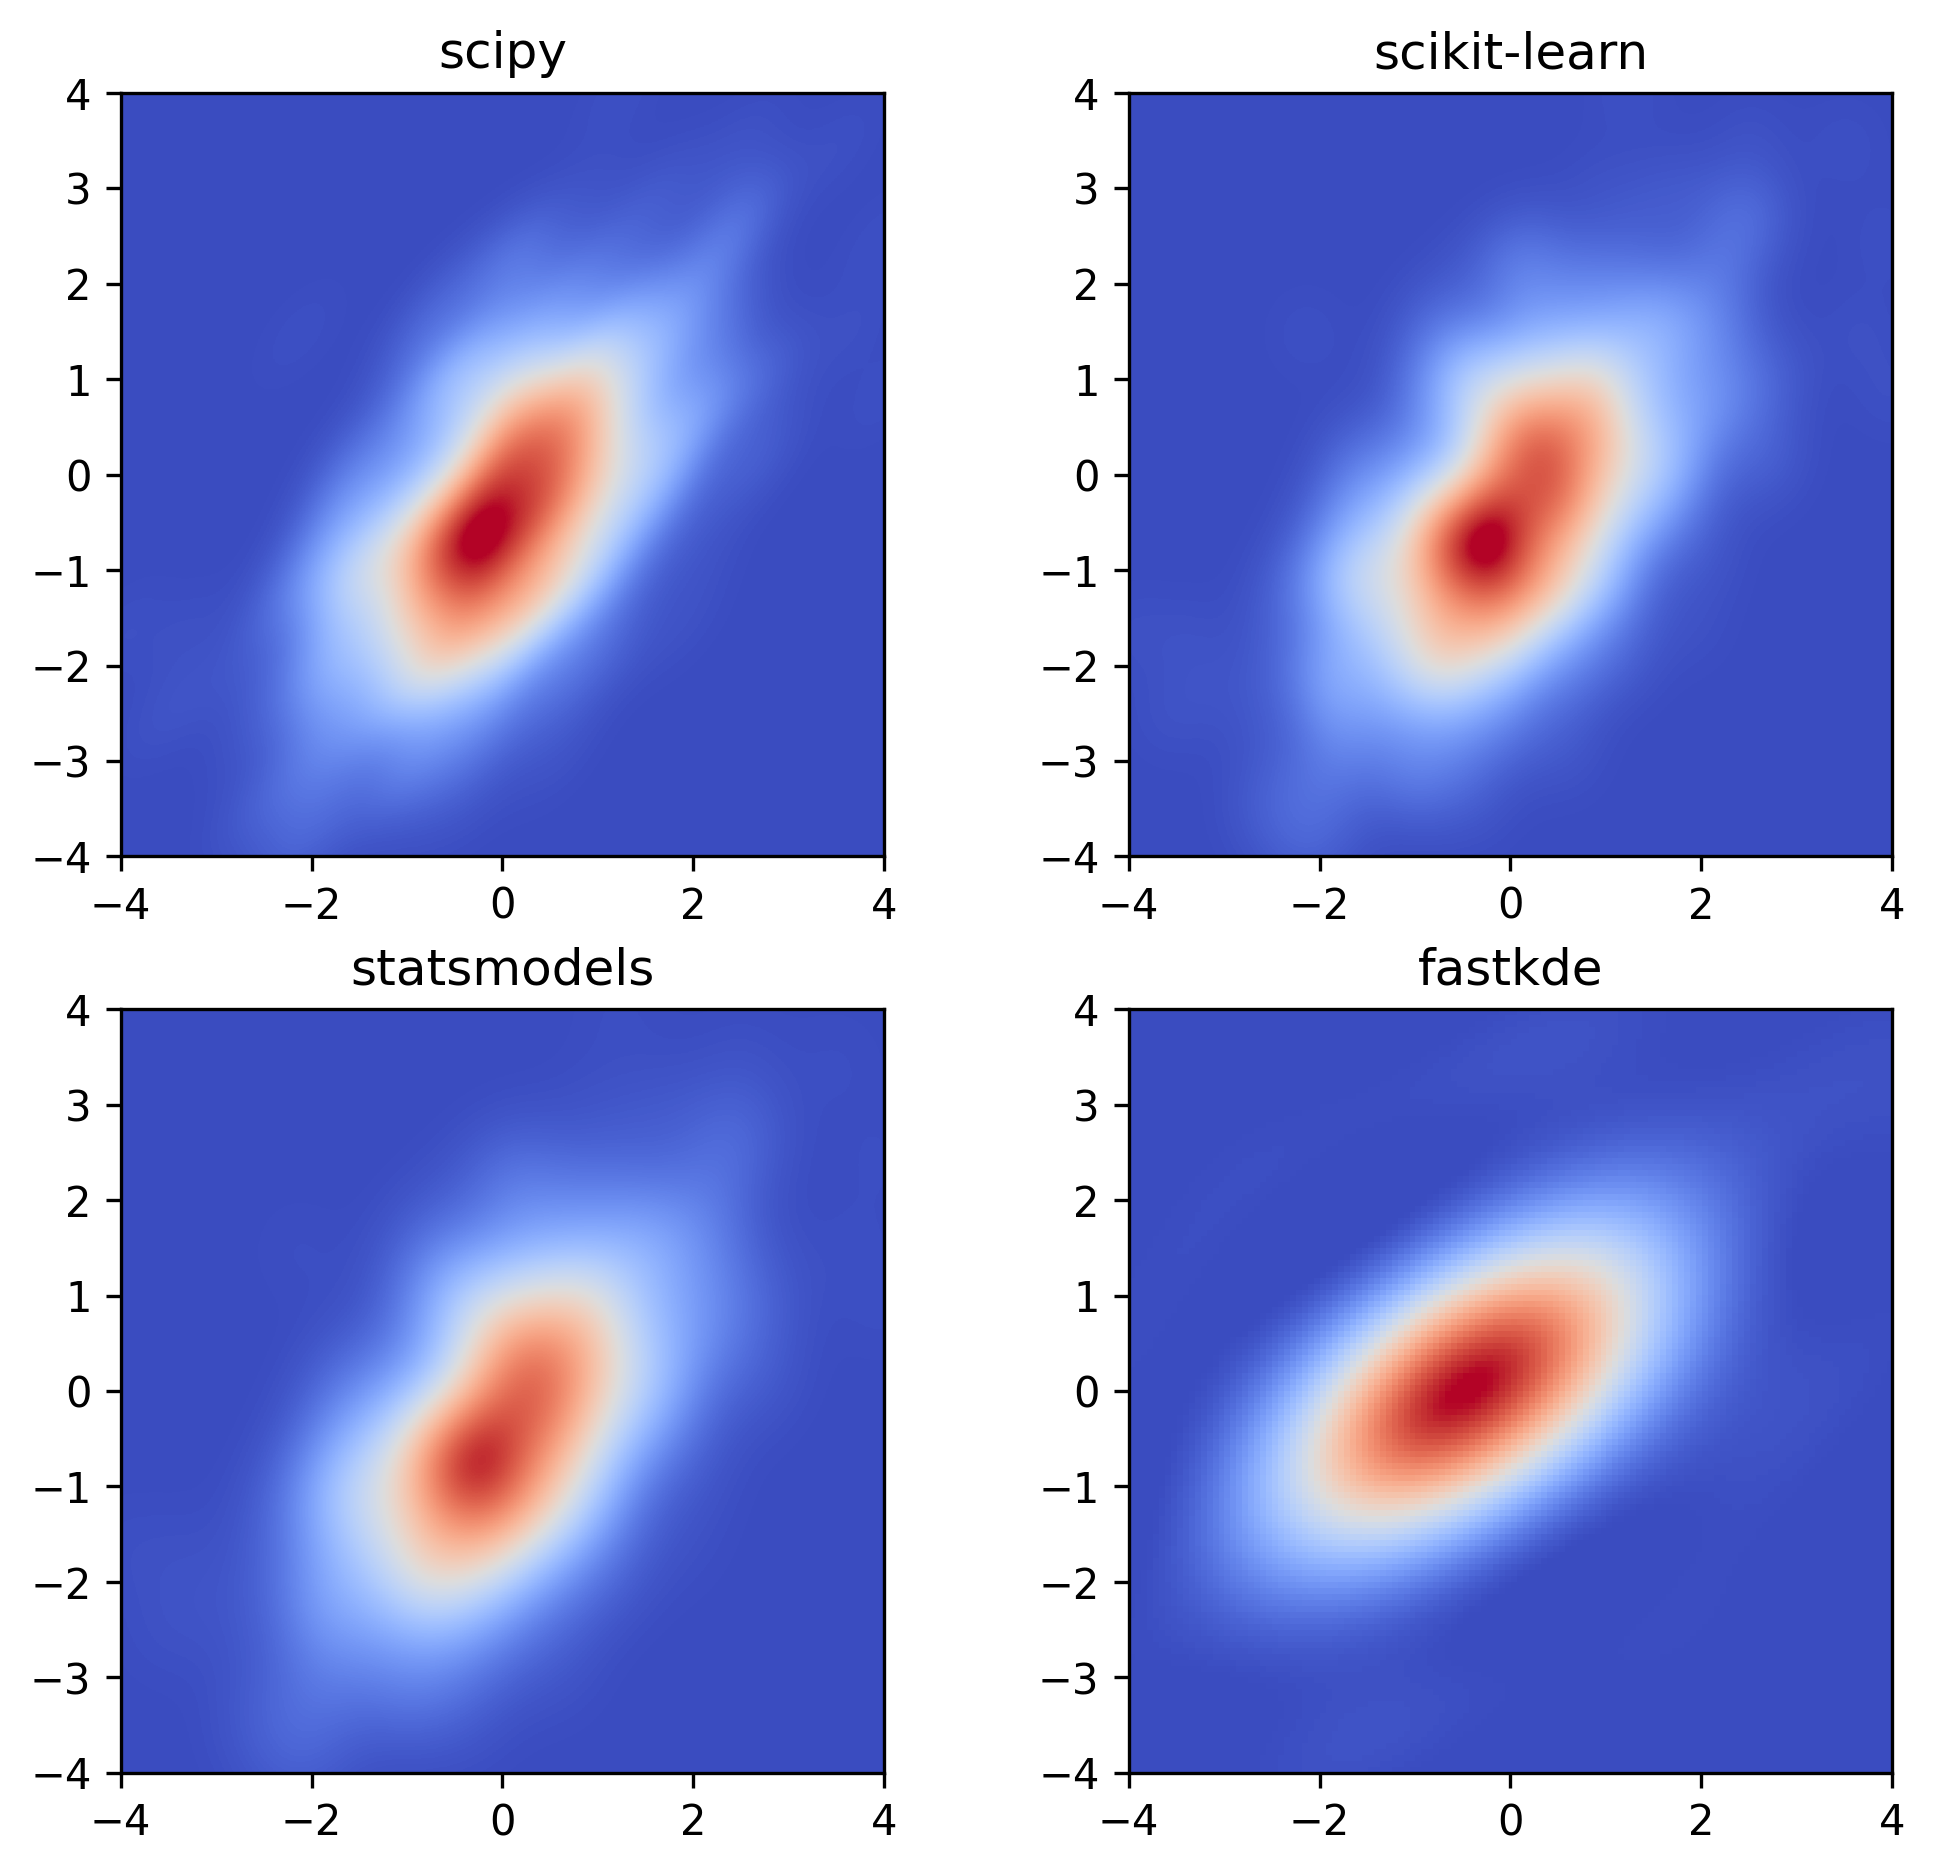

In [56]:
fig, axarr = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.0, bottom=0.18)

ax = axarr[0,0]
kde1(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scipy')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[0,1]
kde2(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scikit-learn')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,0]
kde3(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('statsmodels')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,1]
kde4(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('fastkde')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

#plt.tight_layout()
plt.savefig('kde.png')
plt.show()